# Iris flower Classification Using Decision Tree Algorithm

The "Iris" dataset is a well-known dataset used in machine learning and data analysis. It contains information on the measurements of the sepal length, sepal width, petal length, and petal width of three different species of iris flowers: Iris setosa, Iris versicolor, and Iris virginica. The dataset consists of 150 observations, with 50 observations per species.

Here are the details of the variables in the dataset:

- Sepal length: The length of the sepal of the iris flower (in cm)
- Sepal width: The width of the sepal of the iris flower (in cm)
- Petal length: The length of the petal of the iris flower (in cm)
- Petal width: The width of the petal of the iris flower (in cm)
- Species: The species of the iris flower (Iris setosa, Iris versicolor, or Iris virginica)

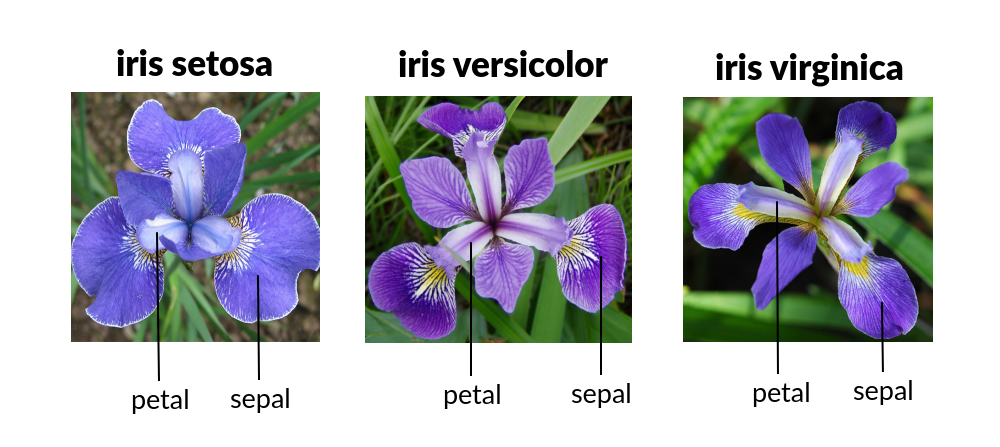

## Importing  required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew,norm

## Reading dataset

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Exploratory data analysis

#### Descriptive Statistics

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Checking for Nan/ Missing Value/ Duplicate Value

In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
df.duplicated().sum()

0

##### Droping ID column

In [9]:
# Id column dont have any signifiacnt information
df.drop('Id',axis=1,inplace=True)

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


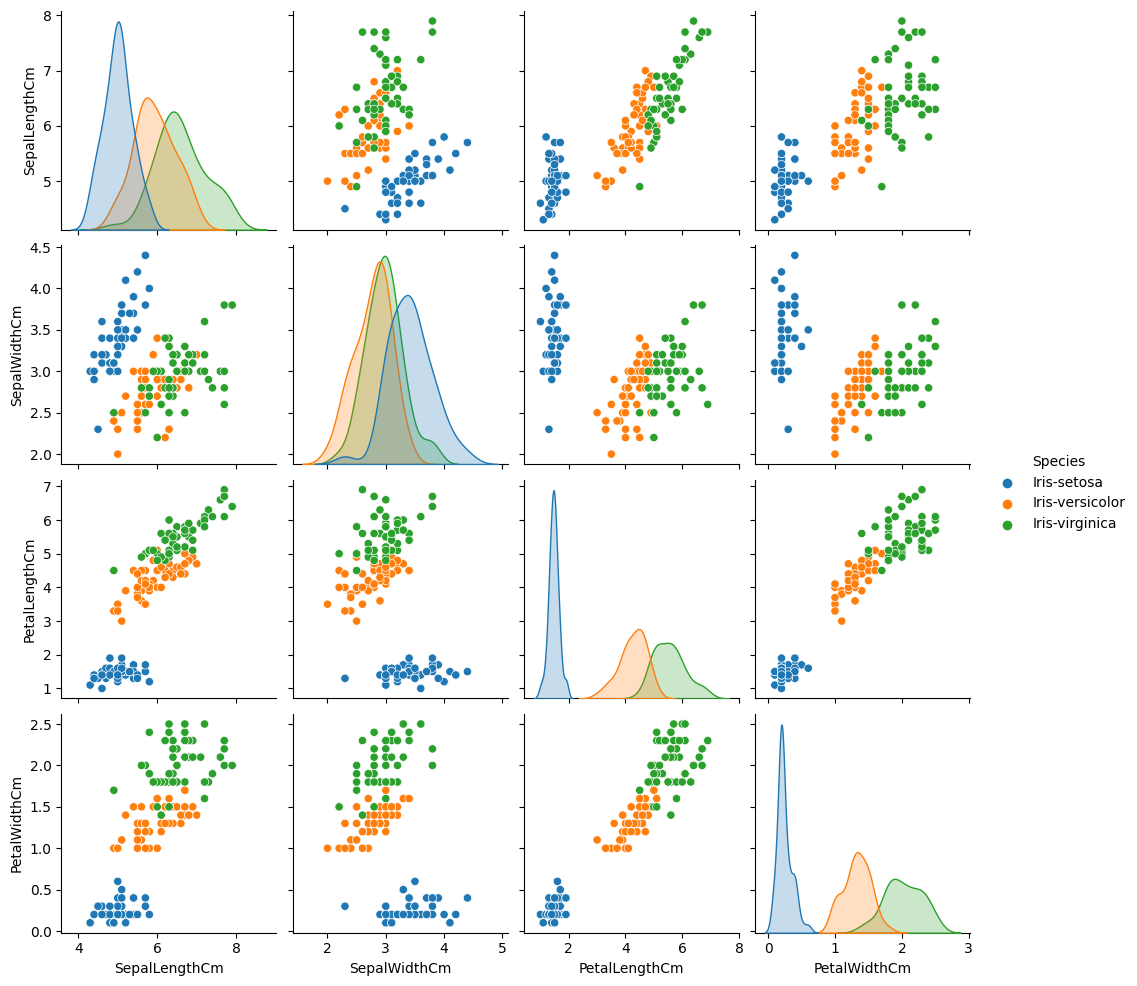

In [11]:
sns.pairplot(df,hue='Species',diag_kind="kde");

## Distribution Plot of Features

In [12]:
column=df.select_dtypes(['int64','float64']).columns

SepalLengthCm
0.3117530585022963


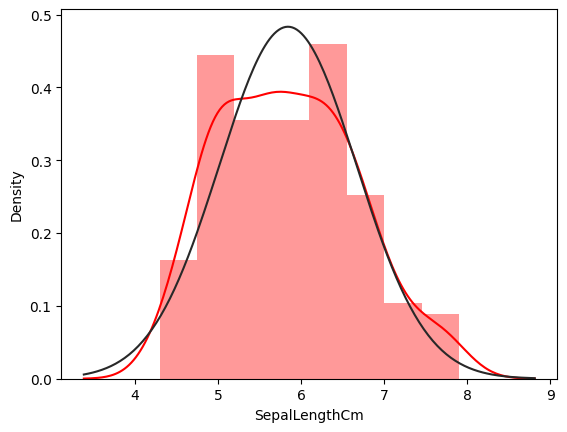

SepalWidthCm
0.330702812773315


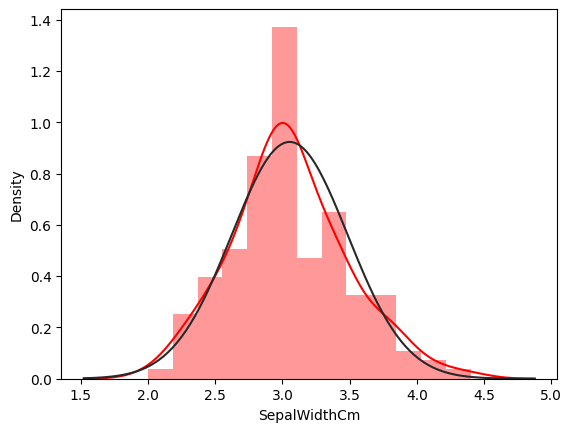

PetalLengthCm
-0.2717119501716388


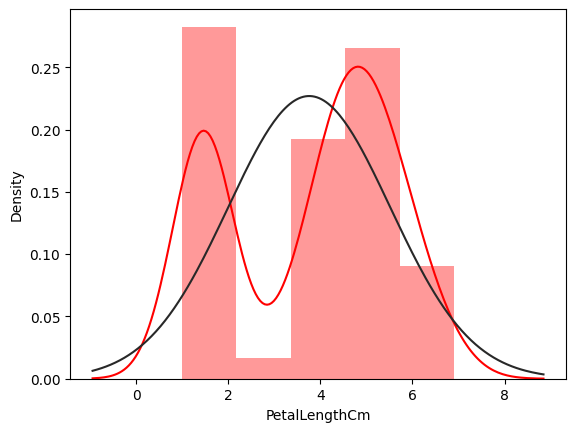

PetalWidthCm
-0.10394366626751729


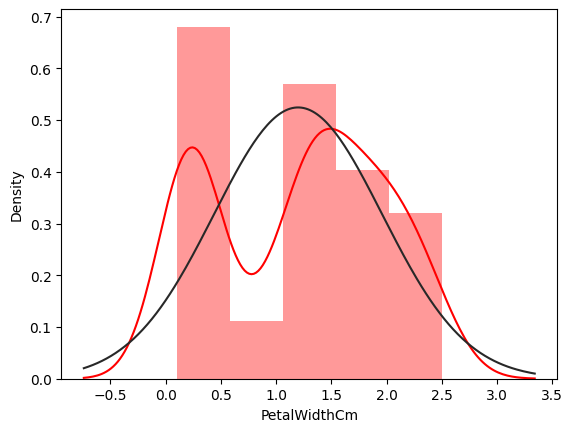

In [13]:
for col in df[column]:
    print(col)
    print(skew(df[col]))
    
    sns.distplot(df[col],color ='red',fit=norm)
    plt.show()

## BoxPlot of Features

SepalLengthCm
0.3117530585022963


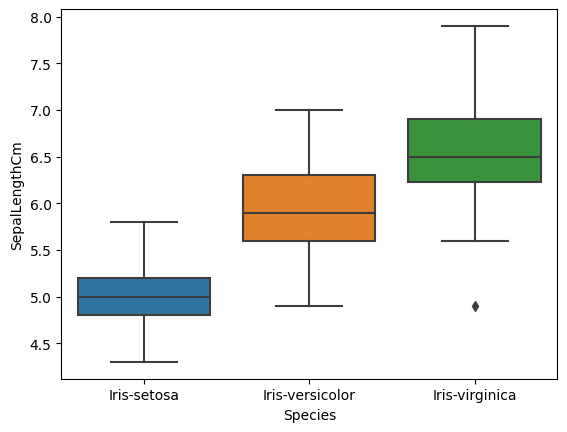

SepalWidthCm
0.330702812773315


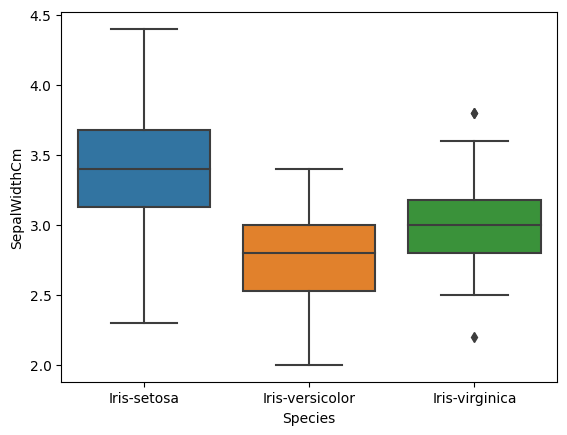

PetalLengthCm
-0.2717119501716388


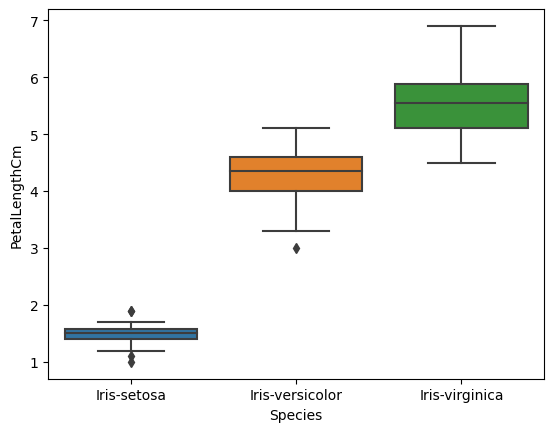

PetalWidthCm
-0.10394366626751729


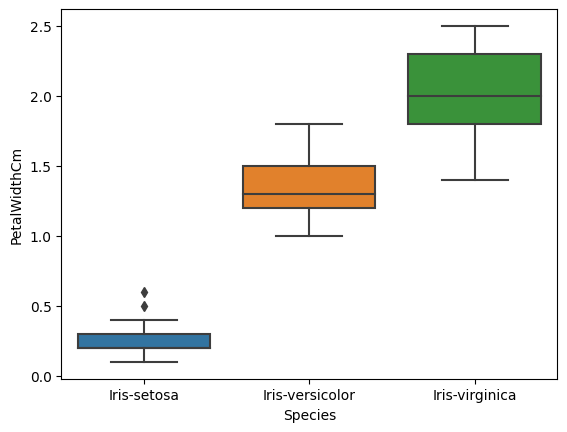

In [14]:
for col in df[column]:
    print(col)
    print(skew(df[col]))
    
    sns.boxplot(data=df,x='Species',y=df[col])
    plt.show()

# PetalLenght VS PetalWidth

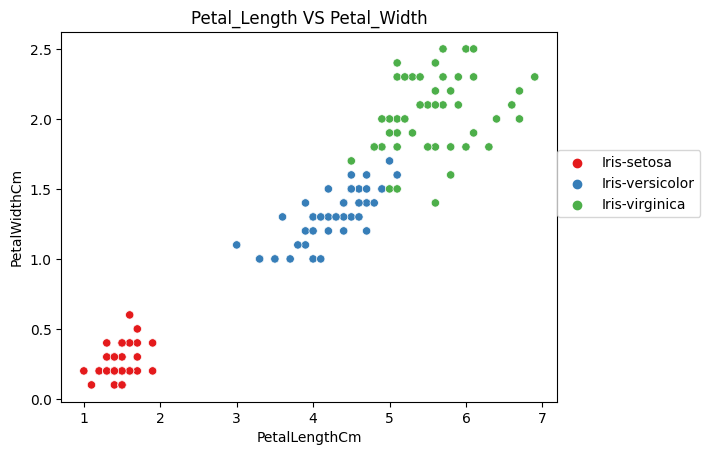

In [15]:
sns.scatterplot(data=df, x="PetalLengthCm", y="PetalWidthCm",hue='Species',palette='Set1')
plt.title("Petal_Length VS Petal_Width")
plt.legend(loc=(1,0.5))
plt.show()

In [16]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Sepal_Length VS Sepal_Width

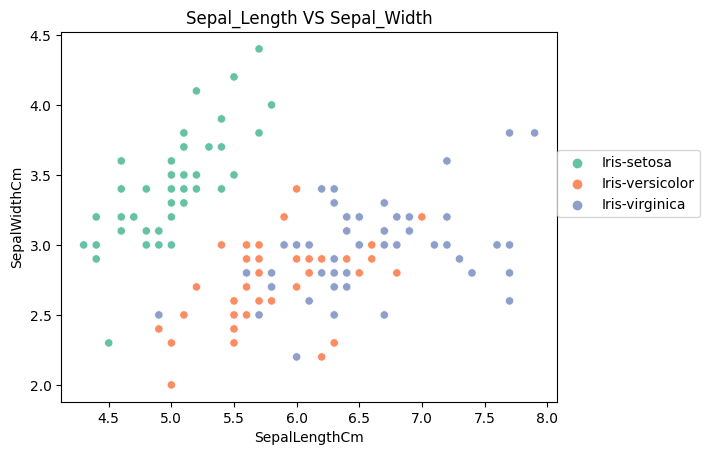

In [17]:
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm',hue='Species',palette='Set2');
plt.title("Sepal_Length VS Sepal_Width")
plt.legend(loc=(1,0.5))
plt.show()

## Target Column- Species

In [18]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

## Encoding

Encoding categorical data is a process of converting categorical data into integer format so that the data with converted categorical values can be provided to the different models. In the field of data science, before going for the modelling, data preparation is a mandatory task.

In [20]:
#label Encoder
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()

In [22]:
df['Species']=le.fit_transform(df['Species'])

In [23]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [24]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

- Perfectly Balanced Target Column

## Spliting dataset

In [26]:
x=df.drop('Species',axis=1)
y=df['Species']

In [27]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=42)

## Importing DecisionTreeClassifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [29]:
dtc.fit(xtrain,ytrain)
ypred = dtc.predict(xtest)

## Model Evaluation

In [30]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,plot_confusion_matrix

Accuracy Score:= 1.0
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



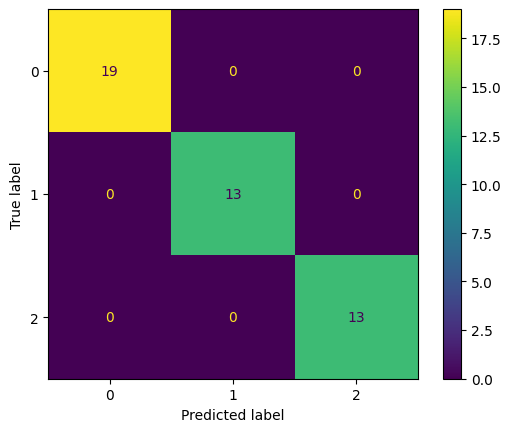

In [31]:
print(f'Accuracy Score:= {accuracy_score(ytest,ypred)}')
print("CLASSIFICATION_REPORT\n",classification_report(ypred,ytest))
print(plot_confusion_matrix(dtc,xtest,ytest))

- The confusion Matrix gives a comparison between actual and predicted values.
- It is used for the optimization of machine learning models.
- The confusion matrix is a N x N matrix, where N is the number of classes or outputs.
- For 2 classes, we get a 2 x 2 confusion matrix.
- For 3 classes, we get a 3 X 3 confusion matrix.

Precision (positive predicted) is the fraction of relevant data among the retrieved data. 

Recall (sensitivity) is the fraction of relevant data that were retrieved

F1-score is a harmonic mean of Precision and Recall

- Accuracy of DecisionTree is 100%
- DecisionTree perfectly classify all the flower.

###### Checking for overfitting/Underfitting

In [32]:
train = dtc.score(xtrain,ytrain)
test  = dtc.score(xtest,ytest)
print(f"Training Accuracy:- {train}\nTesting Accuracy:- {test}")


Training Accuracy:- 1.0
Testing Accuracy:- 1.0


- perfect Model

## Scaling

Feature scaling is a data preprocessing technique that involves transforming the values of features or variables in a dataset to a similar scale. This is done to ensure that all features contribute equally to the model and to prevent features with larger values from dominating the model. Feature scaling is essential when working with datasets where the features have different ranges, units of measurement, or orders of magnitude. Common feature scaling techniques include standardization, normalization, and min-max scaling.

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

xs_train=scaler.fit_transform(xtrain)
xs_test=scaler.transform(xtest)

Accuracy Score:= 1.0
CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



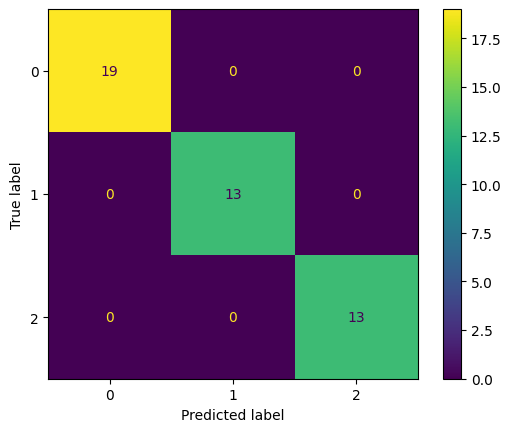

In [34]:
dtcs=DecisionTreeClassifier()
dtcs.fit(xs_train,ytrain)
ypred = dtcs.predict(xs_test)

print(f'Accuracy Score:= {accuracy_score(ytest,ypred)}')
print("CLASSIFICATION_REPORT\n",classification_report(ypred,ytest))
print(plot_confusion_matrix(dtcs,xs_test,ytest))

In [35]:
train = dtcs.score(xs_train,ytrain)
test  = dtcs.score(xs_test,ytest)
print(f"Training Accuracy:- {train}\nTesting Accuracy:- {test}")

Training Accuracy:- 1.0
Testing Accuracy:- 1.0


## HyperParameter Tunning

Some set of parameters that are used to control the behaviour of the model/algorithm and adjustable in order to obtain an improvised model with optimal performance is so-called Hyperparameters.

The best model algorithm(s) will sparkle if your best choice of Hyper-parameters

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
dtc=DecisionTreeClassifier()
param_grid = {
              "criterion":["gini","entropy"],
              "max_depth":list(range(1,20)),
              "min_samples_leaf":list(range(1,20))
}

grid=GridSearchCV(estimator=dtc,param_grid=param_grid,verbose=2)

grid.fit(xs_train,ytrain)
ypred=grid.predict(xs_test)

Fitting 5 folds for each of 722 candidates, totalling 3610 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min

[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=19; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_leaf=19; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=3, min_samples_leaf=2; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini, max_depth=5, min_samples_leaf=7; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=3; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=7, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=4; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=5; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=9, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, max_depth=11, min_samples_leaf=12; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=15; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=16; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, max_depth=13, min_samples_leaf=17; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=16, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=9; total time=   0.0s
[CV] END ...criterion=gini, max_depth=18, min_samples_leaf=9; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, max_depth=18, min_samples_leaf=11; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END criterion=entropy, max_depth=1, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=1, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=3; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy, max_depth=4, min_samples_leaf=4; total time=   0.0s
[CV] END .criterion=entropy,

[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=9; total time=   0.0s
[CV] END .criterion=entropy, max_depth=6, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=6, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=8, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=8, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=10, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_leaf=18; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=13, min_samples_leaf=5; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=15, min_samples_leaf=9; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=11; total time=   0.0s
[CV] END criterion=entropy, max_depth=15, min_samples_leaf=12; total time=   0.0s
[CV] END criterio

[CV] END criterion=entropy, max_depth=17, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=16; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=17; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=18; total time=   0.0s
[CV] END criterion=entropy, max_depth=17, min_samples_leaf=18; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=19, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=13; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=14; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END criterion=entropy, max_depth=19, min_samples_leaf=15; total time=   0.0s
[CV] END criteri

In [38]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3}

Accuracy Score:= 1.0
Training Accuracy:- 0.9714285714285714
Testing Accuracy:- 1.0

CLASSIFICATION_REPORT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



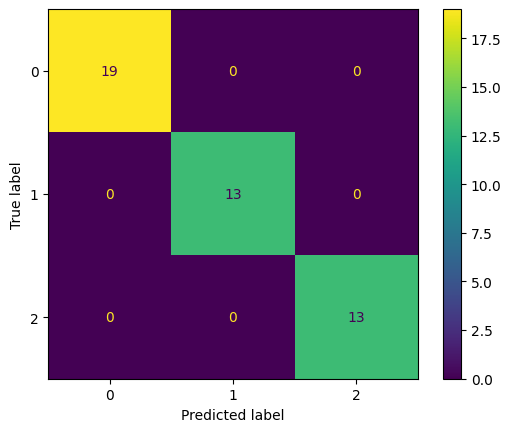

In [39]:
print(f'Accuracy Score:= {accuracy_score(ytest,ypred)}')
train = grid.score(xs_train,ytrain)
test  = grid.score(xs_test,ytest)
print(f"Training Accuracy:- {train}\nTesting Accuracy:- {test}")
print()
print("CLASSIFICATION_REPORT\n",classification_report(ypred,ytest))
print(plot_confusion_matrix(grid,xs_test,ytest))

## Ploting Descision Tree

In [44]:
from sklearn import tree

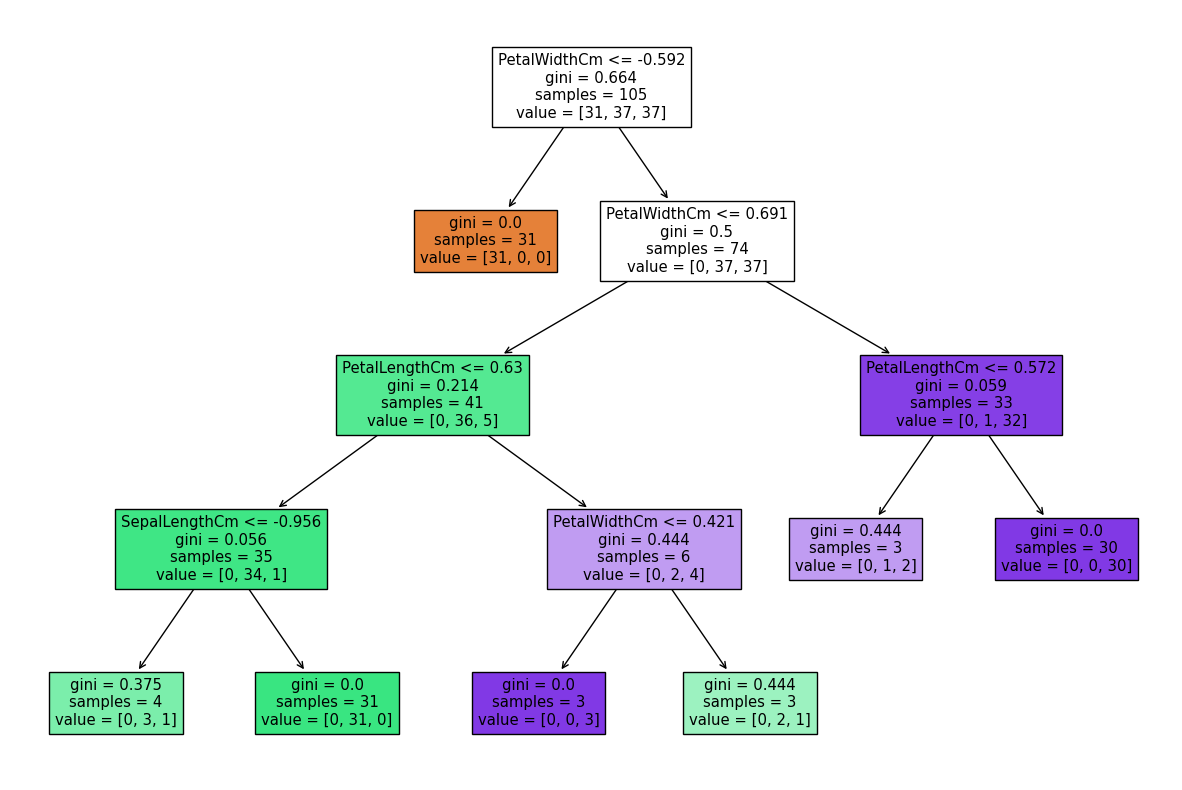

In [42]:
fig, ax = plt.subplots(figsize=(15,10))
tree.plot_tree(grid.best_estimator_, filled=True,feature_names=x.columns)
plt.show()

## Bagging

Bagging, also known as bootstrap aggregation, is the ensemble learning method that is commonly used to reduce variance within a noisy dataset. In bagging, a random sample of data in a training set is selected with replacement—meaning that the individual data points can be chosen more than once.

In [43]:
from sklearn.ensemble import BaggingClassifier
bg = BaggingClassifier(dtc)
bg.fit(xtrain,ytrain)
ypred = bg.predict(xtest)

train =bg.score(xtrain,ytrain)
test = bg.score(xtest,ytest)
print(f"Training Accuracy:- {train}\n Testing Accuracy:- {test}")

print(classification_report(ytest,ypred))

Training Accuracy:- 1.0
 Testing Accuracy:- 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Defining function for Prediction flower`

In [51]:
#final model
Final_model=DecisionTreeClassifier()
Final_model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [64]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [69]:
def predict_iris():
    sepl=float(input("Enter Sepal Length (cm) of FLower:- "))
    sepw=float(input("Enter Sepal Width (cm) of FLower:- "))
    petl=float(input("Enter petal Length (cm) of FLower:- "))
    petw=float(input("Enter petal Width (cm) of FLower:- "))
    
    newob=[[sepl,sepw,petl,petw]]
    yp= Final_model.predict(newob)
    print()
    if yp==0:
        print('Iris-setosa Flower')
    elif yp==1:
        print('Iris-versicolor Flower')
    else:
        print('Iris-virginica Flower')
    return yp

In [72]:
predict_iris()

Enter Sepal Length (cm) of FLower:- 5.1
Enter Sepal Width (cm) of FLower:- 3.5
Enter petal Length (cm) of FLower:- 1.4
Enter petal Width (cm) of FLower:- 0.2

Iris-setosa Flower


array([0])